#  비지도학습(Unsupervised Learning Techniques)
## Clustering

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
from IPython.display import Image
width=800; height=500

## 1. 분류와 클러스터링(Classification vs Clustering)

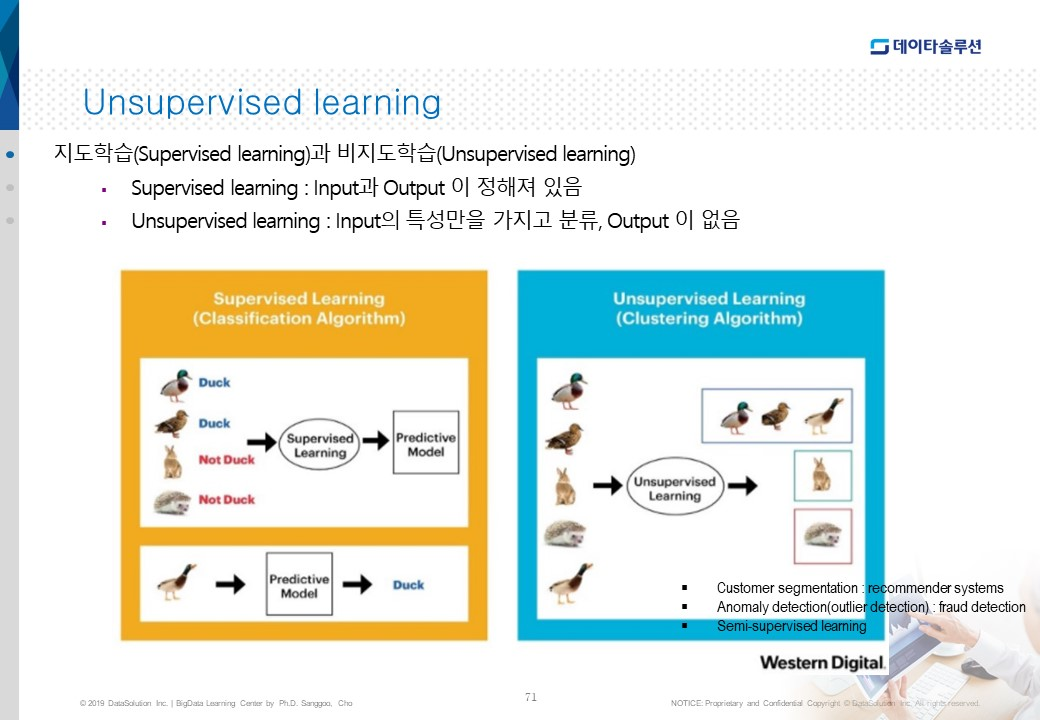

In [4]:
Image('../img/슬라이드71.jpg', width=width, height=height)

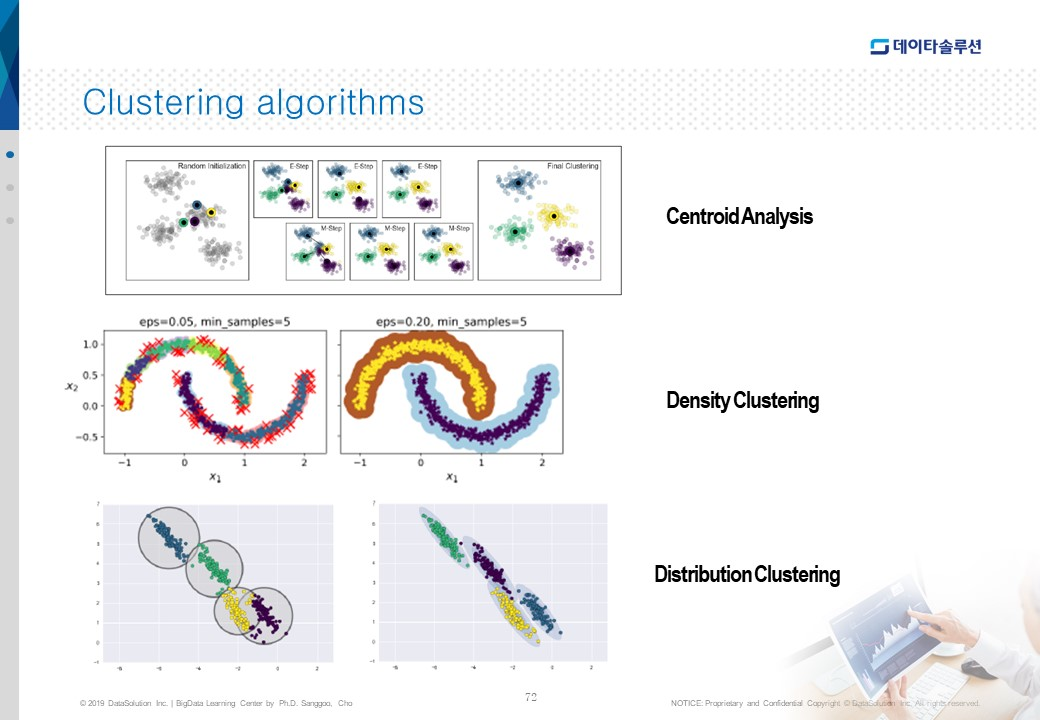

In [5]:
Image('../img/슬라이드72.jpg', width=width, height=height)

In [6]:
from sklearn.datasets import load_iris

In [7]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Figure size 648x252 with 0 Axes>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

Text(0.5, 0, 'Petal length')

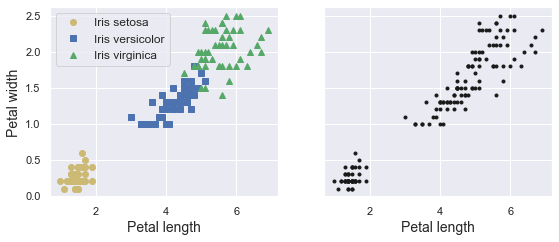

In [8]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

- 눈으로 확인해도 금방 분류가 가능
- 사이킷런의 가우시안믹스쳐(A Gaussian mixture model) 알고리즘으로 4개의 cluster를 쉽게 분류

In [9]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [10]:
y
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

y_pred:mapping:, 0:1, 1:2, 2:0 으로 변환 mapp

In [11]:
mapping = np.array([1,2,0])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

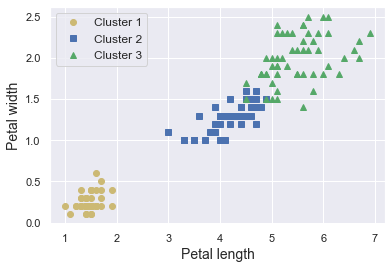

In [12]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

모델의 정확도(Accuracy)

In [13]:
np.sum(y_pred==y)
np.sum(y_pred!=y)

145

5

In [14]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

## 2. K-Means 이해

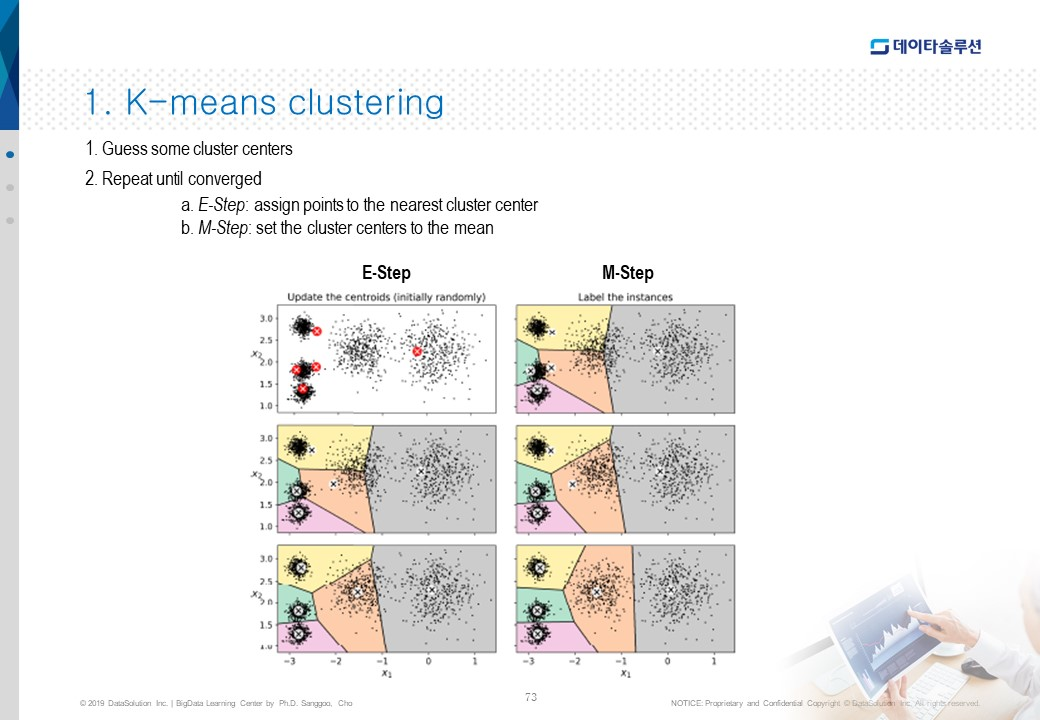

In [15]:
Image('../img/슬라이드73.jpg', width=width, height=height)

blobs 데이터를 생성

In [16]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Now let's plot them:

<Figure size 576x288 with 0 Axes>

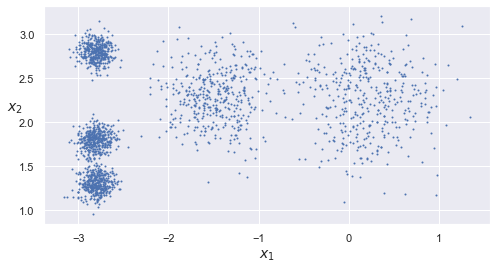

In [17]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 2.1 Fit and Predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [18]:
from sklearn.cluster import KMeans

인스턴스 2,000개를 5개의 cluster로 구분

In [19]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_transform(X)

array([[0.11146795, 3.04611916, 1.45402521, 1.54944305, 0.46779778],
       [0.51431557, 3.11541584, 0.99002955, 1.48612753, 0.07122059],
       [3.76340605, 1.32016676, 4.09069201, 2.67154781, 3.81713488],
       ...,
       [1.42865797, 3.04886464, 0.06769209, 1.40795651, 0.92830156],
       [3.23385668, 0.14895409, 3.05913478, 1.71125   , 3.10300136],
       [0.67518173, 2.8625311 , 0.85434589, 1.21678483, 0.22700281]])

최소값, 최대값의 색인 위치: np.argmin(), np.argmax()

In [20]:
np.argmin(kmeans.fit_transform(X), axis=1)

array([0, 4, 1, ..., 2, 1, 4], dtype=int64)

In [21]:
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the 5 clusters:

In [22]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [23]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [24]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [25]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

- `KMeans`(Class)는 훈련자료(instances)를 학습하여 레이블(Label)을 생성
- instance의 레이블(the _label_ of an instance)는 클러스터의 그룹 명

In [26]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

Of course, we can predict the labels of new instances:

In [27]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

hard clustering

In [28]:
kmeans.predict(X_new)

array([1, 1, 2, 2])

soft clustering

In [29]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

### 2.2 Decision Boundaries

Let's plot the model's decision boundaries. This gives us a <font color='red'>_Voronoi diagram_:

In [30]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=30,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

<Figure size 576x288 with 0 Axes>

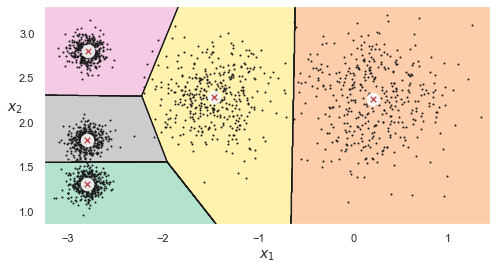

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

- 대부분의 인스턴스는 분류가 정확하지만 그룹사이에 위치한 인스턴스는 잘못된 그룹명(label of cluster)으로 분류
- 전체적으로 Not bad! it looks pretty good.

## 3. K-Means 성능 지표

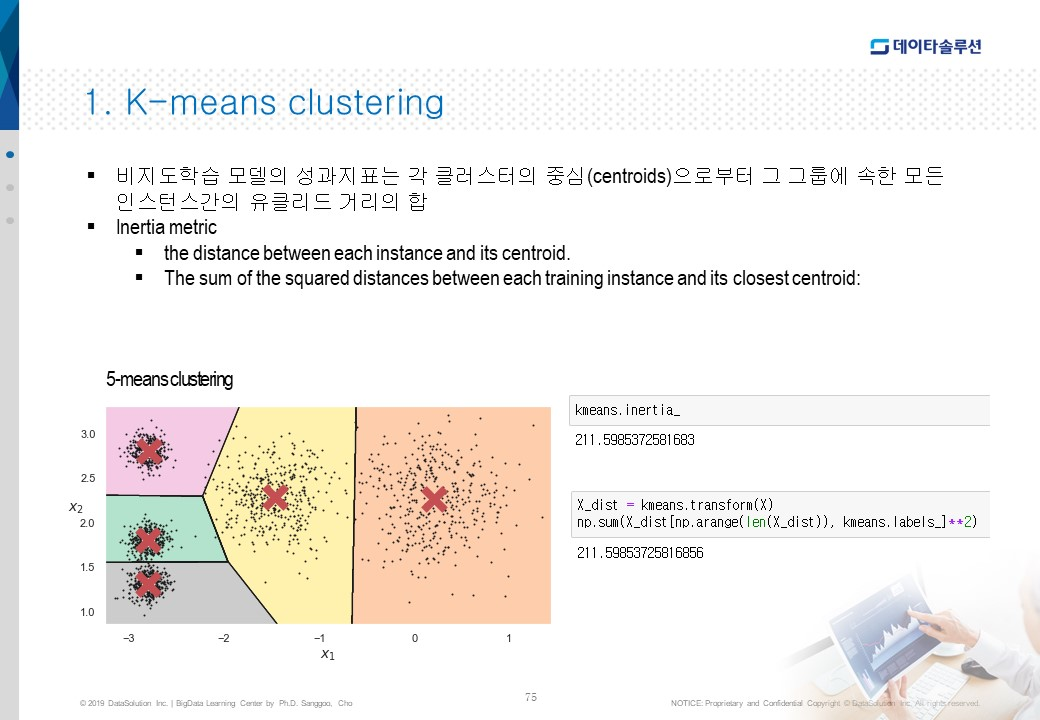

In [32]:
Image('../img//슬라이드75.jpg', width=width, height=height)

### 3.1 K-Means Variability

- 최초로 임의의 그룹별 무게중심(centroids)을 선정하기 때문에 클러스터링의 결과가 다르게 나타날 수있다.
- 초기 random seeds를 달리해서 k-means를 수행하면 그 결과는 변동성(variability)이 발생하게 된다.

In [33]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [34]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=13)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=29)

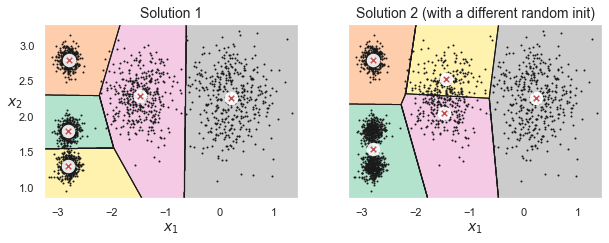

In [35]:
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

### 3.2 최적의 클러스터의 개수 (Finding the optimal number of clusters)
### 3.2.1 클러스터링 분류 성능 지표 _ Inertia
- 비지도학습으로 타겟변수의 label이 없어 예측 성능 지표가 없음
- K-Means 알고리즘의 모델 성능 지표는 
- the distance between each instance and its centroid, <font color = 'red'> the _inertia_ metric
    * 그룹에 속한 인스턴스와 그룹의 무게중심(centroid)과의 거리의 제곱합
    * inertia가 작을수록 클러스터링을 잘했다고 판단

In [36]:
kmeans.inertia_

211.5985372581683

#### inertia = the sum of the squared distances between each training instance and its closest centroid:

In [37]:
X_dist = kmeans.transform(X)
X_dist
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

array([[0.11146795, 3.04611916, 1.45402521, 1.54944305, 0.46779778],
       [0.51431557, 3.11541584, 0.99002955, 1.48612753, 0.07122059],
       [3.76340605, 1.32016676, 4.09069201, 2.67154781, 3.81713488],
       ...,
       [1.42865797, 3.04886464, 0.06769209, 1.40795651, 0.92830156],
       [3.23385668, 0.14895409, 3.05913478, 1.71125   , 3.10300136],
       [0.67518173, 2.8625311 , 0.85434589, 1.21678483, 0.22700281]])

211.59853725816805

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_great is better_" rule.

In [38]:
kmeans.score(X)

-211.5985372581683

클러스터의 개수가 '5' 이하 '8'이상일 경우 비교하면

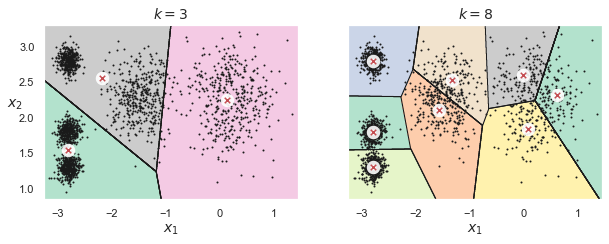

In [39]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

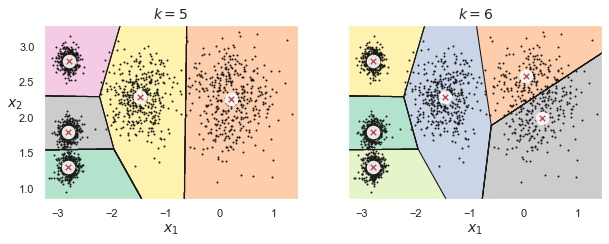

In [40]:
kmeans_k5 = KMeans(n_clusters=5, random_state=42)
kmeans_k6 = KMeans(n_clusters=6, random_state=42)

plot_clusterer_comparison(kmeans_k5, kmeans_k6, X, "$k=5$", "$k=6$")
plt.show()

Ouch, these two models don't look great. What about their inertias?

In [41]:
kmeans_k3.inertia_

653.2223267580945

In [42]:
kmeans_k8.inertia_

118.44108623570084

- inertia가 제일 작은 클러스터링의 개수를 찾으면 안된다.
     * 클러스터링 개수가 많아질수록 그에 비례하여 inertia도 줄어글게 된다.

In [43]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

Text(0.55, 0.55, 'Elbow')

(1.0, 8.5, 0.0, 1300.0)

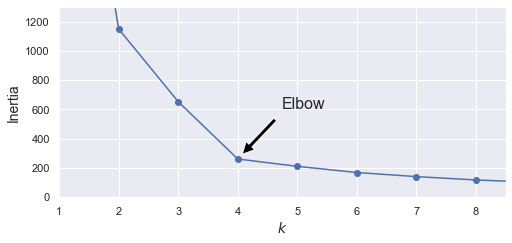

In [44]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

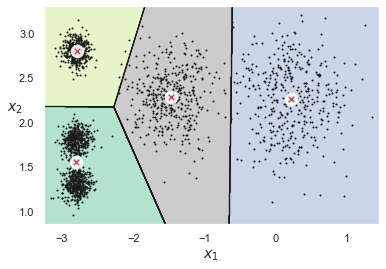

In [45]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

## 3.2.2  silhouette score

### 클러스터링 분류 성능 지표( _silhouette coefficient_)
#### 1: Means clusters are well apart from each other and clearly distinguished.
#### 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
#### -1: Means clusters are assigned in the wrong way.

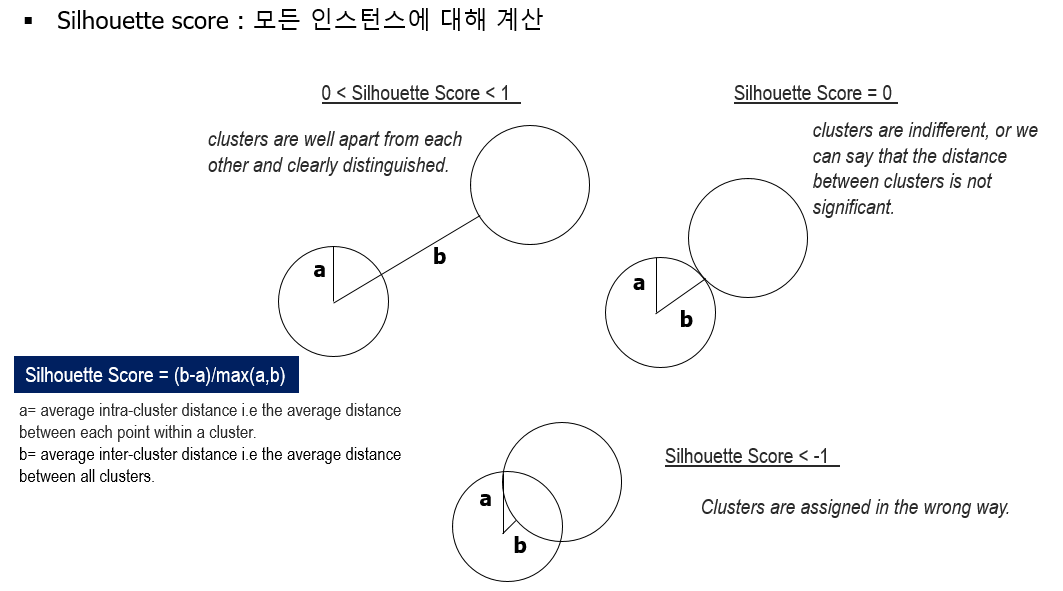

In [46]:
Image('../img/silhouette_score.png', width=width, height=height)

   * _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. 
   * An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), 
      * $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 
   * The silhouette coefficient can vary between -1 and +1:   
      * a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, 
      * while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the <font color='red'> silhouette score as a function of $k$:

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [49]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [50]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [51]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.601878677912387,
 0.6068660656395705,
 0.5616085743054687,
 0.567647042788722]

<Figure size 576x216 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Silhouette score')

(1.8, 8.5, 0.55, 0.7)

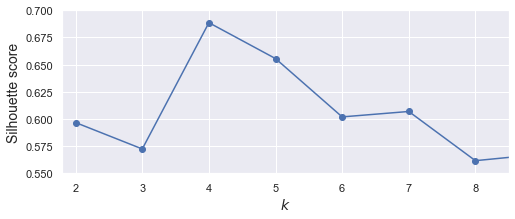

In [52]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

- Elbow 그래프보다 유용한 Silhouette score로 확인하면 $k=4$인 경우가 가장 최적의 clustering이다
- <font color='red'> $k=5$인 경우도 높은 지표를 보여주고 있는데 $k=4$를 최적의 클러스터링이라고 결정하여야 하는가?

### 3.2.3 silhouette diagram
- 각 그룹별 인스턴스의 silhouette coefficient

<Figure size 1440x648 with 0 Axes>

Text(0, 0.5, 'Cluster')

Text(0.5, 1.0, '$k=3$')

Text(0.5, 1.0, '$k=4$')

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette Coefficient')

Text(0.5, 1.0, '$k=5$')

Text(0.5, 0, 'Silhouette Coefficient')

Text(0.5, 1.0, '$k=6$')

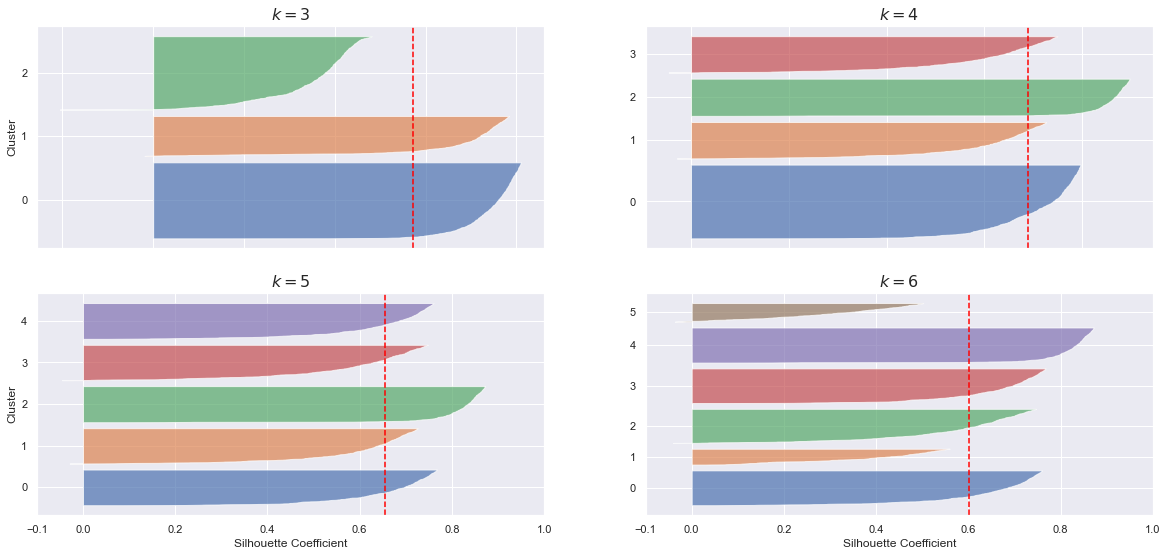

In [53]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(20, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        #color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, alpha=0.7)
        #                  facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- 각 그룹별 인스턴스의 silhouette coefficient가 전체 silhouette coefficient 보다 모두 골고루 높은 <b> $k=5$ 클러스터를 선정<b>하는 것이 최선
   * 전체 실루엣점수(수직 점선)이 $k=4$가 $k=5$ 보다 높음에도 불구하고 

##### pip install yellowbrick

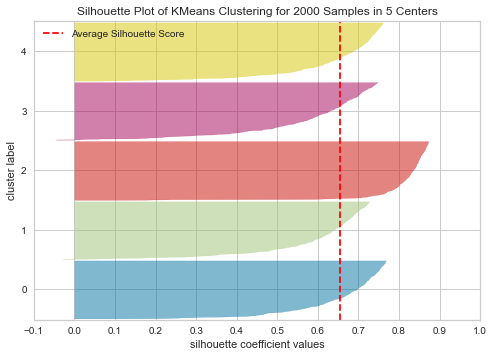

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEC9F38A88>,
                     colors='yellowbrick', model=None)

In [54]:
from yellowbrick.cluster import silhouette_visualizer
# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(n_clusters=5, random_state=16),
                      X, 
                      colors='yellowbrick')

### 3.2.4  K-Means의 한계점 (유클리디언 거리 기준의 한계)
- K-means 알고리즘은 몇 변의 시뮬레이션을 하여 local optimum을 오류를 줄여야 함
- 클러스터별 인스턴스의 수 혹은 밀집도가 차이가 나는 경우 K-Means의 분류성능은 현저히 떨어진다.
- 클러스터별 인스턴스의 분포형태가 구의 형태가 아닌 경우(non-spherical shape)에도 K-Means의 분류성능은 현저히 떨어진다.

## 4. DBSCAN 이해

This algorithm defines clusters as continuous regions of high density. It is actually quite simple:
- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s εneighborhood.
- If an instance has at least min_samples instances in its ε-neighborhood (includ‐ ing itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same cluster. This may include other core instances, therefore a long sequence of neighboring core instances forms a single cluster.

sklearn.cluster.DBSCAN: perform DBSCAN clustering from vector array or distance matrix.
- epsfloat, default=0.5
- min_samplesint, default=5

In [55]:
from sklearn.cluster import DBSCAN

X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
clustering

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

DBSCAN(eps=3, min_samples=2)

In [56]:
clustering = DBSCAN(eps=3, min_samples=3).fit(X)
clustering.labels_
clustering

array([ 0,  0,  0, -1, -1, -1], dtype=int64)

DBSCAN(eps=3, min_samples=3)

Text(0.5, 1.0, 'Two clusters')

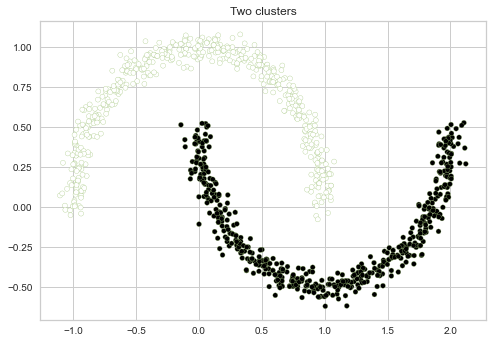

In [57]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.title("Two clusters")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='g')

In [58]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

The labels of all the instances are now available in the labels_ instance variable:

In [59]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

Notice that some instances have a cluster index equal to -1: this means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the core_sample_indices_ instance variable, and the core instances themselves are available in the components_ instance variable:


In [60]:
len(dbscan.core_sample_indices_) # 
dbscan.core_sample_indices_[:20]

808

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       22, 23, 24], dtype=int64)

In [61]:
dbscan.components_.shape
dbscan.components_[:3]

(808, 2)

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [62]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [63]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [64]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

<Figure size 648x230.4 with 0 Axes>

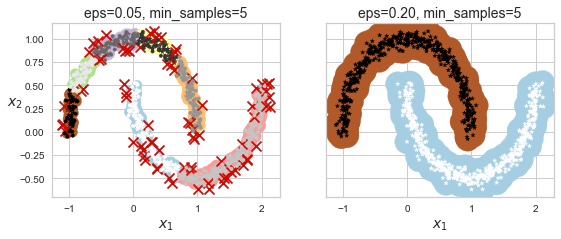

In [65]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

### KNeighborsClassifier with DBSCAN
Somewhat surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method. In other words, it cannot predict which cluster a new instance belongs to. The rationale for this decision is that several classification algorithms could make sense here, and it is easy enough to train one, for example a KNeighborsClassifier:

In [66]:
dbscan = dbscan2

In [67]:
dbscan.components_[:10]
dbscan.core_sample_indices_[:10]
dbscan.labels_[:10] # eps가 0.05에서 0.2로 증가하여 clusteing 이 7개에서 2개로 labeling됨
dbscan.labels_[dbscan.core_sample_indices_][:10]

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       [ 0.37736316, -0.39703717],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 0.68246733,  0.80712069]])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances, we can predict which cluster they most likely belong to, and even estimate a probability for each cluster. Note that we only trained them on the core instances, but we could also have chosen to train them on all the instances, or all but the anomalies: this choice depends on the final task.

In [69]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [70]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

The decision boundary is the crosses represent the 4 instances in X_new). Notice that since there is no anomaly in the KNN’s training set, the classifier always chooses a cluster, even when that cluster is far away. However, it is fairly straightforward to introduce a maximum distance, in which case the two
instances that are far away from both clusters are classified as anomalies. To do this, we can use the kneighbors() method of the KNeighborsClassifier: given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set (two matrices, each with k columns):

<Figure size 432x216 with 0 Axes>

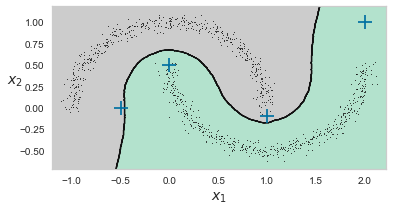

In [71]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [72]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

# End